### **Install Ludwig and Ludwig's LLM related dependencies.**

In [ ]:
!pip uninstall -y tensorflow --quiet
!pip install --upgrade git+https://github.com/huggingface/transformers
!pip install --upgrade git+https://github.com/huggingface/peft.git
!pip install git+https://github.com/ludwig-ai/ludwig.git@master --quiet

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-72ktewou
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-72ktewou
  Resolved https://github.com/huggingface/transformers to commit 487505ff45b1bd134a210853e1339cb205ba77b3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.40.0.dev0-py3-none-any.whl size=8925859 sha256=6d5e756422b412bf63ca88348d9f261d278a384a98b5fbd36dddcf43132adef5
  Stored in directory: /tmp/pip-ephem-wheel-cache-pegq2wx5/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2
  Cloning https://github.com/huggingface

In [ ]:
!pip install --upgrade datasets
!pip install py7zr
!pip install xformers
!pip install accelerate
!pip install -i https://pypi.org/simple/ bitsandbytes



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed

In [ ]:
# !pip show torch

In [ ]:
# !pip show transformers

In [ ]:

import os

import copy

import gc

from typing import Any, Callable

import time

from functools import wraps
from inspect import ( BoundArguments, signature,)

from collections import OrderedDict

from google.colab import data_table

import yaml

import numpy as np
import pandas as pd

import torch
from torch import Tensor

import datasets
from datasets import load_dataset, Dataset, DatasetDict

import transformers
from transformers import BitsAndBytesConfig, AutoModelForCausalLM, LlamaForCausalLM, MistralForCausalLM, AutoTokenizer, LlamaTokenizerFast, GenerationConfig, TextGenerationPipeline, BatchEncoding
from transformers.generation.utils import GreedySearchDecoderOnlyOutput

from peft import PeftModel, PeftModelForCausalLM, PeftConfig, LoraConfig

from ludwig.api import LudwigModel, TrainingResults

import logging



Enable text wrapping so we don't have to scroll horizontally and create a function to flush CUDA cache.

In [ ]:
from IPython.display import HTML, display

def set_css() -> None:
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))

get_ipython().events.register('pre_run_cell', set_css)


In [ ]:
def predict(model: LudwigModel, df_test: pd.DataFrame) -> list[list[str]]:
  return model.predict(df_test)[0]["answer_response"].tolist()

### **Import Dataset** 📋



#### Import Dataset from Google Drive

In [ ]:
import datasets
import pandas as pd
import numpy as np
from datasets import load_dataset, Dataset, DatasetDict
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/PLP_project/data/'

In [ ]:
import os
os.chdir('/content/drive/MyDrive/PLP_project/finetuning_mistral_7b')

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')   # connect to gdrive

# # Change working directory to be current folder
# import os
# os.chdir('/content/gdrive/My Drive/Practice/4/ml-arxiv-papers/mistral-7b')


划分 train、test、val、evaluation

In [ ]:
# train_dataset = data_path + 'train.json'
# test_dataset = data_path + 'test.json'
# validation_dataset = data_path + 'val.json'

ovefitting

In [ ]:
# # load the data locally

# import json

# # load the whole dataset
# with open('/content/drive/MyDrive/PLP_project/data/alldata_overfit30.json', 'r', encoding='utf-8') as file:
#     alldata = json.load(file)
# print("# Total alldata samples:", len(alldata))
# print()

# # 1）split training set
# train_dataset = alldata[:25]
# print("# train_dataset samples:", len(train_dataset))
# print("train_dataset 1st sample:", train_dataset[0])
# print()

# # 2)  split validation set
# validation_dataset = alldata[28:]
# print("# validation_dataset samples:", len(validation_dataset))
# print("validation_dataset 1st sample:", validation_dataset[0])
# print()

# # 3)  split test set
# test_dataset = alldata[25:28]
# print("# tesst_dataset samples:", len(test_dataset))
# print("test_dataset 1st sample:", test_dataset[0])



In [ ]:
# load the data locally

import json

# load the whole dataset
with open('/content/drive/MyDrive/PLP_project/data/alldata.json', 'r', encoding='utf-8') as file:
    alldata = json.load(file)
print("# Total alldata samples:", len(alldata))
print()

# 1）split training set
train_dataset = alldata[:42000]
print("# train_dataset samples:", len(train_dataset))
print("train_dataset 1st sample:", train_dataset[0])
print()

# 2)  split validation set
validation_dataset = alldata[43000:]
print("# validation_dataset samples:", len(validation_dataset))
print("validation_dataset 1st sample:", validation_dataset[0])
print()

# 3)  split test set
test_dataset = alldata[42000:43000]
print("# test_dataset samples:", len(test_dataset))
print("test_dataset 1st sample:", test_dataset[0])



# Total alldata samples: 43713

# train_dataset samples: 42000
train_dataset 1st sample: {'id': 3, 'context': 'An Efficient Mixture of Deep and Machine Learning Models for COVID-19   and Tuberculosis Detection Using X-Ray Images in Resource Limited Settings.Clinicians in the frontline need to assess quickly whether a patient with symptoms indeed has COVID-19 or not. The difficulty of this task is exacerbated in low resource settings that may not have access to biotechnology tests. Furthermore, Tuberculosis (TB) remains a major health problem in several low- and middle-income countries and its common symptoms include fever, cough and tiredness, similarly to COVID-19. In order to help in the detection of COVID-19, we propose the extraction of deep features (DF) from chest X-ray images, a technology available in most hospitals, and their subsequent classification using machine learning methods that do not require large computational resources. We compiled a five-class dataset of X-ray che

In [ ]:
# df_train: pd.DataFrame = pd.read_json(data_path + 'train.json')
# df_test: pd.DataFrame = pd.read_json(data_path + 'test.json')
# df_validation: pd.DataFrame = pd.read_json(data_path + 'val.json')

In [ ]:
import pandas as pd

# Convert lists to dataframes
df_train = pd.DataFrame(train_dataset)
df_test = pd.DataFrame(test_dataset)
df_validation = pd.DataFrame(validation_dataset)


In [ ]:
# df_evaluation: pd.DataFrame = pd.read_json(data_path + 'evaluation.json')

In [ ]:
df_evaluation = pd.DataFrame(test_dataset)  # 和testset取同样的数据


##### combine train、test、val as df_dataset

In [ ]:
from google.colab import data_table; data_table.enable_dataframe_formatter()
import numpy as np; np.random.seed(123)


In [ ]:
df_train["split"] = np.zeros(df_train.shape[0])
df_test["split"] = np.ones(df_test.shape[0])
df_validation["split"] = np.full(df_validation.shape[0], 2)


In [ ]:
df_dataset = pd.concat([df_train, df_test, df_validation])


In [ ]:
# 合并 question 和 context 列为新的列 input
# df_dataset['input'] = 'question: ' + df_dataset['question'] + ' \n context: ' + df_dataset['context']
df_dataset['input'] = 'question: "' + df_dataset['question'] + '" \n context: "' + df_dataset['context'] + '"'   # 分别给冒号:后面的内容都加上双引号 " "
df_evaluation['input'] = 'question: "' + df_evaluation['question'] + '" \n context: "' + df_evaluation['context'] + '"'

In [ ]:
df_dataset["split"] = df_dataset["split"].astype(int)


#### data visualization

In [ ]:
df_dataset.shape


(43713, 6)

In [ ]:
df_dataset.head(3)


# print(df_dataset.iloc[43001])  #查看split标记(0, 1 or 2)


,id,context,question,answer,split,input
0,3,An Efficient Mixture of Deep and Machine Learn...,How was the detection pipeline for COVID-19 an...,The detection pipeline was developed by extrac...,0,"question: ""How was the detection pipeline for ..."
1,5,Max-Margin Deep Generative Models for (Semi-)S...,What are max-margin deep generative models for...,Max-margin deep generative models (mmDGMs) and...,0,"question: ""What are max-margin deep generative..."
2,9,Compensating trajectory bias for unsupervised ...,How can adversarial recurrent neural networks ...,Adversarial recurrent neural networks can comp...,0,"question: ""How can adversarial recurrent neura..."


Average number of tokens in the context column: 413
Average number of tokens in the question column: 23
Average number of tokens in the answer column: 158


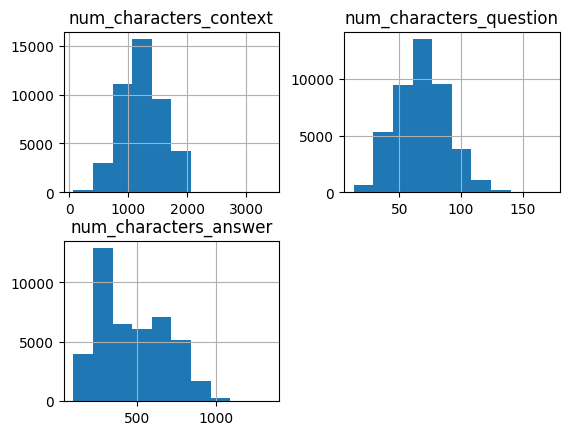

In [ ]:
# Calculating the length of each cell in each column
df_dataset['num_characters_context'] = df_dataset['context'].apply(lambda x: len(x))
df_dataset['num_characters_question'] = df_dataset['question'].apply(lambda x: len(x))
df_dataset['num_characters_answer'] = df_dataset['answer'].apply(lambda x: len(x))

# Show Distribution
df_dataset.hist(column=['num_characters_context', 'num_characters_question', 'num_characters_answer'])

# Calculating the average
average_chars_context = df_dataset['num_characters_context'].mean()
average_chars_question = df_dataset['num_characters_question'].mean()
average_chars_answer = df_dataset['num_characters_answer'].mean()

print(f'Average number of tokens in the context column: {(average_chars_context / 3):.0f}')
print(f'Average number of tokens in the question column: {(average_chars_question / 3):.0f}')
print(f'Average number of tokens in the answer column: {(average_chars_answer / 3):.0f}')

In [ ]:
df_evaluation.head(2)

,id,context,question,answer,input
0,112194,Neural Mesh: Introducing a Notion of Space and...,What is the unique feature of the Neural Mesh ...,The unique feature of the Neural Mesh architec...,"question: ""What is the unique feature of the N..."
1,112196,Learning Deep Graph Representations via Convol...,How does DeepMap learn deep graph representati...,DeepMap addresses the limitations of graph ker...,"question: ""How does DeepMap learn deep graph r..."


## Use base model to Inference

### load base model

In [ ]:
bnb_config_base_model: BitsAndBytesConfig = BitsAndBytesConfig(
    load_in_8bit=True,
)

In [ ]:
mistral_7b_sharded_base_model_name: str = "alexsherstinsky/Mistral-7B-v0.1-sharded"

In [ ]:
base_model_tokenizer: LlamaTokenizerFast = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=mistral_7b_sharded_base_model_name, trust_remote_code=True, padding_side="left")
print(base_model_tokenizer.eos_token)
base_model_tokenizer.pad_token = base_model_tokenizer.eos_token

tokenizer_config.json:   0%|          | 0.00/979 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/145 [00:00<?, ?B/s]

</s>


In [ ]:
base_model: MistralForCausalLM = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=mistral_7b_sharded_base_model_name, device_map="auto", torch_dtype=torch.float16, offload_folder="offload", trust_remote_code=True, low_cpu_mem_usage=True, quantization_config=bnb_config_base_model)

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

### run inference

#### example prompt

In [ ]:
df_samsum_evaluation_1: pd.DataFrame = df_evaluation.head(10).copy()


In [ ]:
prompt_template: str = """
You are a helpful, respectful and honest assistant. \
Your task is to generate an answer to the given question. \
And your answer should be based on the provided context only.

### Input: {input}

### Answer:
"""

In [ ]:
df_samsum_evaluation_1["prompt"] = df_samsum_evaluation_1["input"].apply(lambda x: samsum_prompt_template_1.format(**{"input": x}))

In [ ]:
base_model_sequences_generator: TextGenerationPipeline = transformers.pipeline(
    task="text-generation",
    tokenizer=base_model_tokenizer,
    model=base_model,
    torch_dtype=torch.float16,
    device_map="auto",
)

In [ ]:
base_model_sequences_1 = base_model_sequences_generator(
    text_inputs=df_samsum_evaluation_1["prompt"].to_list(),
    do_sample=True,
    top_k=50,
    num_return_sequences=1,
    eos_token_id=base_model_tokenizer.eos_token_id,
    max_length=128,
    return_text=True,
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
print(f'\n[BASE_MODEL_EVALUATION_BEGIN]')
idx: int = 0
print(f'\n[=============EXAMPLE_{idx}_BEGIN=============]')
for input, answer in zip(df_samsum_evaluation_1["input"].to_list(), base_model_sequences_1):
  print(f'\n[BASE_MODEL_EVALUATION] GENERATED_ANSWER:\n{answer[0]["generated_text"]}')
  print(f'\n[=============EXAMPLE_{idx}_END=============]')
  idx += 1

print(f'\n[BASE_MODEL_EVALUATION_END]')


[BASE_MODEL_EVALUATION_BEGIN]

[=============EXAMPLE_0_BEGIN=============]

[BASE_MODEL_EVALUATION] GENERATED_ANSWER:

You are a helpful, respectful and honest assistant. Your task is to generate an answer to the given question. And your answer should be based on the provided context only.

### Input: question: "What is the unique feature of the Neural Mesh architecture?" 
 context: "Neural Mesh: Introducing a Notion of Space and Conservation of Energy to   Neural Networks.Neural networks are based on a simplified model of the brain. In this project, we wanted to relax the simplifying assumptions of a traditional neural network by making a model that more closely emulates the low level interactions of neurons. Like in an RNN, our model has a state that persists between time steps, so that the energies of neurons persist. However, unlike an RNN, our state consists of a 2 dimensional matrix, rather than a 1 dimensional vector, thereby introducing a concept of distance to other neurons w

#### official prompt

In [ ]:
df_samsum_evaluation_2: pd.DataFrame = df_evaluation.head(10).copy()


In [ ]:
samsum_prompt_template_2: str = """
[INST] <<SYS>>
You are a helpful, detailed, and polite AI assistant.
Answer the question using only the provided context.
<</SYS>>

### Input: {input}

### Answer:
[/INST]
"""

In [ ]:
df_samsum_evaluation_2["prompt"] = df_samsum_evaluation_2["input"].apply(lambda x: samsum_prompt_template_2.format(**{"input": x}))

In [ ]:
base_model_sequences_generator: TextGenerationPipeline = transformers.pipeline(
    task="text-generation",
    tokenizer=base_model_tokenizer,
    model=base_model,
    torch_dtype=torch.float16,
    device_map="auto",
)

In [ ]:
base_model_sequences_2 = base_model_sequences_generator(
    text_inputs=df_samsum_evaluation_2["prompt"].to_list(),
    do_sample=True,
    top_k=50,
    num_return_sequences=1,
    eos_token_id=base_model_tokenizer.eos_token_id,
    max_length=512,
    return_text=True,
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
print(f'\n[BASE_MODEL_EVALUATION_BEGIN]')
idx: int = 0
print(f'\n[=============EXAMPLE_{idx}_BEGIN=============]')
for input, answer in zip(df_samsum_evaluation_2["input"].to_list(), base_model_sequences_2):
  print(f'\n[BASE_MODEL_EVALUATION] GENERATED_ANSWER:\n{answer[0]["generated_text"]}')
  print(f'\n[=============EXAMPLE_{idx}_END=============]')
  idx += 1

print(f'\n[BASE_MODEL_EVALUATION_END]')


[BASE_MODEL_EVALUATION_BEGIN]

[=============EXAMPLE_0_BEGIN=============]

[BASE_MODEL_EVALUATION] GENERATED_ANSWER:

[INST] <<SYS>>
You are a helpful, detailed, and polite AI assistant.
Answer the question using only the provided context.
<</SYS>>

### Input: question: "What is the unique feature of the Neural Mesh architecture?" 
 context: "Neural Mesh: Introducing a Notion of Space and Conservation of Energy to   Neural Networks.Neural networks are based on a simplified model of the brain. In this project, we wanted to relax the simplifying assumptions of a traditional neural network by making a model that more closely emulates the low level interactions of neurons. Like in an RNN, our model has a state that persists between time steps, so that the energies of neurons persist. However, unlike an RNN, our state consists of a 2 dimensional matrix, rather than a 1 dimensional vector, thereby introducing a concept of distance to other neurons within the state. In our model, neurons ca

## finetuning process.

1.generation中的temperature：温度参数越低，模型生成的文本越保守和确定性，更有可能选择概率最高的词作为下一个词；而温度参数越高，模型生成的文本越多样化，更有可能选择概率较低的词或进行更多的随机采样。

2.Adapter用于fine tuning，它允许模型学习特定任务或数据集上的附加知识，同时保持对模型整体结构的较小修改。适配器可以被添加到预训练模型的各个层中，以便在不影响模型整体参数的情况下进行微调或扩展。

这一部分即：qlora_fine_tuning_config: dict = yaml.safe_load(qlora_fine_tuning_yaml)。
qlora_fine_tuning_yaml 是一个YAML格式的配置文件，其中包含了对迁移学习任务的相关配置信息

overfitting:

In [ ]:
# qlora_fine_tuning_config: dict = yaml.safe_load(
# """
# model_type: llm
# base_model: alexsherstinsky/Mistral-7B-v0.1-sharded

# input_features:
#   - name: prompt
#     type: text
#     preprocessing:
#       max_sequence_length: 512

# output_features:
#   - name: answer
#     type: text
#     preprocessing:
#       max_sequence_length: 512

# prompt:
#   template: |
#     [INST] <<SYS>>
#     You are a helpful, respectful and honest assistant. \
#     Your task is to generate an answer to the given question. \
#     And your answer should be based on the provided context only.
#     <</SYS>>

#     ### input: {input}

#     ### Answer:
#     [/INST]

# generation:
#   temperature: 0.8
#   max_new_tokens: 200  # 数据集answer的max_token=177，希望生成的结果token数也在这个范围

# adapter:
#   type: lora
#   postprocessor:
#     merge_adapter_into_base_model: true
#     progressbar: true

# quantization:
#   bits: 8

# # preprocessing:
# #   split:
# #     type: random
# #     probabilities: [0.7, 0.1, 0.2]  原本是90% for training, 5% for validation, 5% for testing
# #     type: fixed

# trainer:
#   type: finetune
#   train_steps: 50    # 16个epoch. train_steps * gradient_accumulation_steps * batch size = epoch * samples_train
#   batch_size: 4
#   steps_per_checkpoint: 5 # 共保存6个checkpoints
#   eval_steps: 5
#   eval_batch_size: 4
#   early_stop: 3
#   gradient_accumulation_steps: 2  # effective batch size = batch size * gradient_accumulation_steps

#   # compile: true
#   learning_rate: 2.0e-4
#   enable_gradient_checkpointing: true
#   learning_rate_scheduler:
#     decay: cosine
#     warmup_fraction: 0.03
#     reduce_on_plateau: 0
#   use_mixed_precision: true
#   validation_field: combined
#   validation_metric: loss
#   enable_profiling: true  #使用 torch.profiler.profile 启用训练过程分析
#   profiler:
#      wait: 1
#      warmup: 1
#      active: 3
#      repeat: 5
#      skip_first: 0
# """
# )

官方方法：

In [ ]:
qlora_fine_tuning_config: dict = yaml.safe_load(
"""
model_type: llm
base_model: alexsherstinsky/Mistral-7B-v0.1-sharded

input_features:
  - name: prompt
    type: text
    preprocessing:
      max_sequence_length: 512

output_features:
  - name: answer
    type: text
    preprocessing:
      max_sequence_length: 128

prompt:
  template: |
    [INST] <<SYS>>
    You are a helpful, detailed, and polite AI assistant.
    Answer the question using only the provided context.
    <</SYS>>

    ### Question: {question}
    ### Context: {context}

    ### Answer:
    [/INST]

generation:
  temperature: 0.8
  max_new_tokens: 128
  max_new_tokens: 150  # 数据集answer的max_token=177，希望生成的结果token数也在这个范围

adapter:
  type: lora
  postprocessor:
    merge_adapter_into_base_model: true
    progressbar: true

quantization:
  bits: 8

preprocessing:
  global_max_sequence_length: 512
  split:
    # type: random
    # probabilities: [0.7, 0.1, 0.2]  原本是90% for training, 5% for validation, 5% for testing
    type: fixed

trainer:
  type: finetune
  # train_steps: 7500    # 3个epoch. train_steps * gradient_accumulation_steps * batch size = epoch * sample_train
  epochs: 3
  batch_size: 16
  # steps_per_checkpoint: 500 # 共保存15个checkpoints(原本为500)
  checkpoints_per_epoch: 1
  # eval_steps: 500
  eval_batch_size: 16
  # early_stop: 3
  gradient_accumulation_steps: 2  # effective batch size = batch size * gradient_accumulation_steps

  learning_rate: 2.0e-4
  enable_gradient_checkpointing: true
  learning_rate_scheduler:
    decay: cosine
    warmup_fraction: 0.03
    reduce_on_plateau: 0
  use_mixed_precision: true
  validation_field: combined
  validation_metric: loss
  enable_profiling: true  #使用 torch.profiler.profile 启用训练过程分析
  profiler:
     wait: 1
     warmup: 1
     active: 3
     repeat: 5
     skip_first: 0
  skip_all_evaluation: false
"""
)

example方法：

In [ ]:
# qlora_fine_tuning_config: dict = yaml.safe_load(
# """
# model_type: llm
# base_model: alexsherstinsky/Mistral-7B-v0.1-sharded

# input_features:
#   - name: input
#     type: text
#     preprocessing:
#       max_sequence_length: 500

# output_features:
#   - name: answer
#     type: text
#     preprocessing:
#       max_sequence_length: 150

# prompt:
#   template: >-
#     You are a helpful, respectful and honest assistant. \
#     Your task is to generate an answer to the given question. \
#     And your answer should be based on the provided context only.

#     ### Input: {input}

#     ### Answer:

# generation:
#   temperature: 0.8
#   max_new_tokens: 150  # 数据集answer的max_token=177，希望生成的结果token数也在这个范围

# adapter:
#   type: lora
#   postprocessor:
#     merge_adapter_into_base_model: true
#     progressbar: true

# quantization:
#   bits: 8

# preprocessing:
#   global_max_sequence_length: 512
#   split:
#     # type: random
#     # probabilities: [0.7, 0.1, 0.2]  原本是90% for training, 5% for validation, 5% for testing
#     type: fixed

# trainer:
#   type: finetune
#   train_steps: 7500    # 3个epoch. train_steps * gradient_accumulation_steps * batch size = epoch * sample_train
#   batch_size: 8
#   steps_per_checkpoint: 50 # 共保存15个checkpoints(原本为500)
#   eval_steps: 50
#   eval_batch_size: 8
#   early_stop: 3
#   gradient_accumulation_steps: 2  # effective batch size = batch size * gradient_accumulation_steps

#   learning_rate: 2.0e-4
#   enable_gradient_checkpointing: true
#   learning_rate_scheduler:
#     decay: cosine
#     warmup_fraction: 0.03
#     reduce_on_plateau: 0
#   use_mixed_precision: true
#   validation_field: combined
#   validation_metric: loss
#   enable_profiling: true  #使用 torch.profiler.profile 启用训练过程分析
#   profiler:
#      wait: 1
#      warmup: 1
#      active: 3
#      repeat: 5
#      skip_first: 0
#   skip_all_evaluation: false
# """
# )

In [ ]:
prompt:
  template: >-
    You are a helpful, respectful and honest assistant. \
    Your task is to generate an answer to the given question. \
    And your answer should be based on the provided context only.

    ### input: {input}

    ### Answer:


In [ ]:
# prompt:
#   template: |
#     [INST] <<SYS>>
#     You are a helpful, detailed, and polite AI assistant.
#     Answer the question using only the provided context.
#     <</SYS>>

#     ### Question: {question}
#     ### Context: {context}

#     ### Answer:
#     [/INST]

In [ ]:
import os
import torch

用 LudwigModel 进行fine-tuning，加载配置文件 qlora_fine_tuning_config 并基于其中定义的参数来构建和训练模型。

In [ ]:
model: LudwigModel = LudwigModel(config=qlora_fine_tuning_config, logging_level=logging.INFO)

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

Check GPU usage and clear CUDA before finetuning

In [ ]:
import torch

# Get CUDA memory usage before running the code
print("\nBefore clearing CUDA cache:")
print("Current CUDA memory allocated: {:.2f} GB".format(torch.cuda.memory_allocated() / 1024**3))
print("Max CUDA memory allocated: {:.2f} GB".format(torch.cuda.max_memory_allocated() / 1024**3))

# Clear CUDA cache
torch.cuda.empty_cache()

# Get CUDA memory usage after running the code
print("\nAfter clearing CUDA cache:")
print("Current CUDA memory allocated: {:.2f} GB".format(torch.cuda.memory_allocated() / 1024**3))
print("Max CUDA memory allocated: {:.2f} GB".format(torch.cuda.max_memory_allocated() / 1024**3))


# Get the number of available GPUs
num_gpus = torch.cuda.device_count()
print("\nNumber of available GPUs:", num_gpus)

# Iterate over each GPU and print its properties
for i in range(num_gpus):
    gpu_properties = torch.cuda.get_device_properties(i)
    print("GPU {} - Total memory: {:.2f} GB".format(i, gpu_properties.total_memory / 1024**3))



Before clearing CUDA cache:
Current CUDA memory allocated: 0.00 GB
Max CUDA memory allocated: 0.00 GB

After clearing CUDA cache:
Current CUDA memory allocated: 0.00 GB
Max CUDA memory allocated: 0.00 GB

Number of available GPUs: 1
GPU 0 - Total memory: 39.56 GB


调用了LudwigModel对象的train方法，使用给定的数据集df_dataset对模型进行训练。

In [ ]:
import torch._dynamo
torch._dynamo.config.suppress_errors = True

In [ ]:
results: TrainingResults = model.train(dataset=df_dataset)   # Will save relevant files in current path and create a ./results folder in current path

INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒════════════════════════╕
INFO:ludwig.utils.print_utils:│ EXPERIMENT DESCRIPTION │
INFO:ludwig.utils.print_utils:╘════════════════════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.api:╒══════════════════╤═════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                          │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run                                                                                     │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ /content/drive/MyDrive/PLP_project/finetuning_mistral_7b/results/api_experiment_run     │
├──────────────────┼─────────────────────────────────────────────────────────────────

tokenizer_config.json:   0%|          | 0.00/979 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/145 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of alexsherstinsky/Mistral-7B-v0.1-sharded tokenizer
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO:ludwig.features.text_feature:Max length of feature 'None': 793 (without start and stop symbols)
INFO:ludwig.features.text_feature:Max sequence length is 512 for feature 'None'
INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of alexsherstinsky/Mistral-7B-v0.1-sharded tokenizer
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO:ludwig.features.text_feature:Max length of feature 'answer': 293 (without start and stop symbols)
INFO:ludwig.features.text_feature:Max sequence length is 128 for feature 'answer'
INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of alexsherstinsky/Mistral-7B-v0.1-sharded tokenizer
Aski

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

INFO:ludwig.models.llm:Done.
INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of alexsherstinsky/Mistral-7B-v0.1-sharded tokenizer
INFO:ludwig.models.llm:==================================================
INFO:ludwig.models.llm:Trainable Parameter Summary For Fine-Tuning
INFO:ludwig.models.llm:Fine-tuning with adapter: lora
INFO:ludwig.models.llm:==================================================
INFO:ludwig.trainers.trainer:Gradient checkpointing enabled for training.
INFO:ludwig.trainers.trainer:Enabling automatic mixed precision (AMP)
INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒══════════╕
INFO:ludwig.utils.print_utils:│ TRAINING │
INFO:ludwig.utils.print_utils:╘══════════╛
INFO:ludwig.utils.print_utils:


trainable params: 3,407,872 || all params: 7,245,139,968 || trainable%: 0.0470


INFO:ludwig.trainers.trainer:Creating fresh model training run.
INFO:ludwig.trainers.trainer:Training for 7875 step(s), approximately 3 epoch(s).
INFO:ludwig.trainers.trainer:Early stopping policy: 5 round(s) of evaluation, or 13125 step(s), approximately 5 epoch(s).

INFO:ludwig.trainers.trainer:Starting with step 0, epoch: 0


Training:   0%|          | 0/7875 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Training:  33%|███▎      | 2625/7875 [7:39:37<14:52:18, 10.20s/it, loss=3.18]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 2625, epoch: 1


Evaluation valid: 100%|██████████| 63/63 [03:46<00:00,  3.59s/it]


INFO:ludwig.trainers.trainer_llm:Input: [INST] <<SYS>>
You are a helpful, detailed, and polite AI assistant.
Answer the question using only the provided context.
<</SYS>>

### Question: What is the unique feature of the Neural Mesh architecture?
### Context: Neural Mesh: Introducing a Notion of Space and Conservation of Energy to   Neural Networks.Neural networks are based on a simplified model of the brain. In this project, we wanted to relax the simplifying assumptions of a traditional neural network by making a model that more closely emulates the low level interactions of neurons. Like in an RNN, our model has a state that persists between time steps, so that the energies of neurons persist. However, unlike an RNN, our state consists of a 2 dimensional matrix, rather than a 1 dimensional vector, thereby introducing a concept of distance to other neurons within the state. In our model, neurons can only fire to adjacent neurons, as in the brain. Like in the brain, we only allow neuro

Evaluation test :   0%|          | 0/45 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Evaluation test : 100%|██████████| 45/45 [02:41<00:00,  3.58s/it]


INFO:ludwig.trainers.trainer_llm:Input: [INST] <<SYS>>
You are a helpful, detailed, and polite AI assistant.
Answer the question using only the provided context.
<</SYS>>

### Question: What are the key features of deep approximately orthogonal nonnegative matrix factorization?
### Context: Deep Approximately Orthogonal Nonnegative Matrix Factorization for   Clustering.Nonnegative Matrix Factorization (NMF) is a widely used technique for data representation. Inspired by the expressive power of deep learning, several NMF variants equipped with deep architectures have been proposed. However, these methods mostly use the only nonnegativity while ignoring task-specific features of data. In this paper, we propose a novel deep approximately orthogonal nonnegative matrix factorization method where both nonnegativity and orthogonality are imposed with the aim to perform a hierarchical clustering by using different level of abstractions of data. Experiment on two face image datasets showed that

Training:  67%|██████▋   | 5250/7875 [15:10:52<7:25:15, 10.18s/it, loss=7.27]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 5250, epoch: 2


Evaluation valid: 100%|██████████| 63/63 [03:42<00:00,  3.53s/it]


INFO:ludwig.trainers.trainer_llm:Input: [INST] <<SYS>>
You are a helpful, detailed, and polite AI assistant.
Answer the question using only the provided context.
<</SYS>>

### Question: What is the unique feature of the Neural Mesh architecture?
### Context: Neural Mesh: Introducing a Notion of Space and Conservation of Energy to   Neural Networks.Neural networks are based on a simplified model of the brain. In this project, we wanted to relax the simplifying assumptions of a traditional neural network by making a model that more closely emulates the low level interactions of neurons. Like in an RNN, our model has a state that persists between time steps, so that the energies of neurons persist. However, unlike an RNN, our state consists of a 2 dimensional matrix, rather than a 1 dimensional vector, thereby introducing a concept of distance to other neurons within the state. In our model, neurons can only fire to adjacent neurons, as in the brain. Like in the brain, we only allow neuro

Evaluation test :   0%|          | 0/45 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Evaluation test : 100%|██████████| 45/45 [02:38<00:00,  3.52s/it]


INFO:ludwig.trainers.trainer_llm:Input: [INST] <<SYS>>
You are a helpful, detailed, and polite AI assistant.
Answer the question using only the provided context.
<</SYS>>

### Question: What are the key features of deep approximately orthogonal nonnegative matrix factorization?
### Context: Deep Approximately Orthogonal Nonnegative Matrix Factorization for   Clustering.Nonnegative Matrix Factorization (NMF) is a widely used technique for data representation. Inspired by the expressive power of deep learning, several NMF variants equipped with deep architectures have been proposed. However, these methods mostly use the only nonnegativity while ignoring task-specific features of data. In this paper, we propose a novel deep approximately orthogonal nonnegative matrix factorization method where both nonnegativity and orthogonality are imposed with the aim to perform a hierarchical clustering by using different level of abstractions of data. Experiment on two face image datasets showed that

Training:  79%|███████▉  | 6255/7875 [18:07:03<4:32:42, 10.10s/it, loss=9.72]

In [ ]:
# import shutil

# # 定义results保存路径
# destination_path = './mistral-7b-ml'

# # 确保results保存路径存在
# os.makedirs(destination_path, exist_ok=True)

# # 如果目标路径已存在，则先删除目标路径中的内容
# if os.path.exists(destination_path):
#     shutil.rmtree(destination_path)

In [ ]:
# # 复制结果文件夹到指定路径
# shutil.copytree('./results', destination_path)  #手动添加model创建的路径


### Perform Inference（after fine-tuning）

We can now use the model we finetuned above to make predictions on some test examples to see whether finetuning the large language model improve its ability to follow instructions/the tasks we're asking it to perform.

使用已经训练好的 Ludwig 模型对评估数据集 df_evaluation 进行预测

使用model_predict 方法来对评估数据集 df_evaluation 进行预测。返回的结果是一个包含两个 DataFrame 的元组：predictions_and_probabilities，第一个 DataFrame 包含预测结果，第二个 DataFrame 包含对应的概率值。

In [ ]:
df_evaluation_1 = df_evaluation.head(20)

In [ ]:
predictions_and_probabilities: tuple[pd.DataFrame, pd.DataFrame] = model.predict(df_evaluation_1)


将预测结果所在的 DataFrame 从元组predictions_and_probabilities中提取出来，并赋值给变量 df_predictions

In [ ]:
df_predictions: pd.DataFrame = predictions_and_probabilities[0]

In [ ]:
df_predictions.columns

In [ ]:
print("\n\n")
for prompt_with_summary in zip(df_evaluation_1['input'], df_predictions['answer_response']):
  print(f"Input:\n{prompt_with_summary[0]}")
  print(f"Generated Answer:\n{prompt_with_summary[1][0]}")
  print("\n\n")

评估evaluation

In [ ]:
!pip install rouge
!pip install bert-score

In [ ]:
answer = df_predictions['answer_response']  # 生成的answer
ground_truth = df_evaluation['answer']  # 参考answer

In [ ]:
# Optimized code
# semantic similarity (METEOR and BERTScore)
# word and phrase level overlap (BLEU and ROUGE scores)

import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
from rouge import Rouge
from bert_score import score

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')


def calculate_scores(results):
    total_bert_score = 0
    total_meteor_score = 0
    total_bleu_score = 0
    total_rouge_score = {'rouge-1': 0.0, 'rouge-2': 0.0, 'rouge-l': 0.0}
    num_results = len(results)

    for result in results:
        answer = result.get('answer')
        ground_truth = result.get('ground_truth')

        if not answer or not ground_truth:
            continue  # Skip empty answers or ground truths

        # Tokenize hypothesis and reference
        hypothesis_tokens = word_tokenize(answer)
        reference_tokens = word_tokenize(ground_truth)

        # BERTScore
        _, _, F1 = score([answer], [ground_truth], lang='en', verbose=False)
        total_bert_score += F1.item()

        # METEOR
        meteor = meteor_score([reference_tokens], hypothesis_tokens)
        total_meteor_score += meteor

        # BLEU
        bleu_score = sentence_bleu([reference_tokens], hypothesis_tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=None)
        total_bleu_score += bleu_score

        # ROUGE
        rouge = Rouge()
        rouge_scores = rouge.get_scores(answer, ground_truth)[0]
        for metric, scores in rouge_scores.items():
            total_rouge_score[metric] += scores['f']

    average_bert_score = total_bert_score / num_results
    average_meteor_score = total_meteor_score / num_results
    average_bleu_score = total_bleu_score / num_results
    average_rouge_score = {metric: score / num_results for metric, score in total_rouge_score.items()}

    return average_bert_score, average_meteor_score, average_bleu_score, average_rouge_score


def load_results(file_path):
    try:
        with open(file_path, "r") as f:
            results = json.load(f)
        return results
    except FileNotFoundError:
        print("File not found:", file_path)
    except json.JSONDecodeError:
        print("Invalid JSON format in file:", file_path)
    return []


if __name__ == "__main__":
    # Define file path
    file_path = "/content/drive/MyDrive/PLP_project/results/results/test_dataset_results.json"  # path to the results file

    # Load results
    results = load_results(file_path)

    # Calculate scores
    if results:
        average_bert_score, average_meteor_score, average_bleu_score, average_rouge_score = calculate_scores(results)

        # Print average scores
        print("Average BERTScore:", average_bert_score)
        print("Average METEOR score:", average_meteor_score)
        print("Average BLEU score:", average_bleu_score)
        print("Average Rouge score:", average_rouge_score)



In [ ]:
# from rouge import Rouge

# rouge = Rouge()

# # 创建用于存储ROUGE分数的列表
# rouge_scores = []

# for gen_answers, ref_answers in zip(gen_summaries, ref_summaries):
#     scores = rouge.get_scores(gen_answers, ref_answers)
#     rouge_scores.append(scores)

# # 保存 ROUGE 分数到 CSV 文件
# output_file_path = '/content/drive/MyDrive/PLP_project/try/rouge_scores.csv'
# pd.DataFrame(rouge_scores).to_csv(output_file_path, index=False)

# print("ROUGE scores saved to", output_file_path)

## Upload to Huggingface

In [ ]:
!pip install huggingface-cli


In [ ]:
import subprocess

def huggingface_login():
    try:
        # 运行 huggingface-cli login 命令
        subprocess.run(["huggingface-cli", "login"], check=True)
        print("Login successful!")
    except subprocess.CalledProcessError as e:
        print("Login failed:", e)

# 调用登录函数
huggingface_login()


Login failed: Command '['huggingface-cli', 'login']' returned non-zero exit status 1.


In [ ]:
!ludwig upload hf_hub --repo_id "lalalalinze/mistral_7b_finetuning" --model_path /content/drive/MyDrive/PLP_project/finetuning_mistral_7b/results/api_experiment_run


adapter_model.safetensors: 100% 13.6M/13.6M [00:02<00:00, 5.71MB/s]
Model weights uploaded to `https://huggingface.co/lalalalinze/mistral_7b_finetuning/tree/main/` with repository name `lalalalinze/mistral_7b_finetuning`
Model config uploaded to `https://huggingface.co/lalalalinze/mistral_7b_finetuning/blob/main/ludwig_config.json` with repository name `lalalalinze/mistral_7b_finetuning`


In [ ]:
fine_tuned_model_name: str = "lalalalinze/mistral_7b_finetuning"

In [ ]:
gc.collect()

12889473

## Load the finetuned LoRA layers for Mistral 7B LLM (adapter weights for SAMSum dataset).

In [ ]:
fine_tuned_model_name: str = "lalalalinze/mistral_7b_finetuning"
mistral_7b_sharded_base_model_name: str = "alexsherstinsky/Mistral-7B-v0.1-sharded"

In [ ]:
df_evaluation_1 = df_evaluation.head(20)

In [ ]:
print(f'\n[LOADING_MODEL] FINE_TUNED_AND_MERGED:\n{fine_tuned_model_name}')
# samsum_tokenizer: LlamaTokenizerFast = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=fine_tuned_model_name, trust_remote_code=True, padding_side='left')
samsum_tokenizer: LlamaTokenizerFast = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=mistral_7b_sharded_base_model_name, trust_remote_code=True, padding_side="left")
bnb_config_samsum_fine_tuned_model: BitsAndBytesConfig = BitsAndBytesConfig(
  load_in_8bit=True,
)
model_load: MistralForCausalLM = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=fine_tuned_model_name, torch_dtype=torch.float16, trust_remote_code=True, device_map="auto", quantization_config=bnb_config_samsum_fine_tuned_model, low_cpu_mem_usage=True)


[LOADING_MODEL] FINE_TUNED_AND_MERGED:
lalalalinze/mistral_7b_finetuning


tokenizer_config.json:   0%|          | 0.00/979 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/145 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/664 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/13.6M [00:00<?, ?B/s]

Inference using loaded model

In [ ]:
samsum_sequences_generator: TextGenerationPipeline = transformers.pipeline(
    task="text-generation",
    tokenizer=samsum_tokenizer,
    model=model_load,
    torch_dtype=torch.float16,
    device_map="auto",
)

In [ ]:
prompt_template: str = """
You are a helpful, respectful and honest assistant. \
Your task is to generate an answer to the given question. \
And your answer should be based on the provided context only.

### input: {input}

### Answer:
"""

In [ ]:
df_evaluation_1["prompt"] = df_evaluation_1["input"].apply(lambda x: prompt_template.format(**{"input": x}))

<ipython-input-32-32222f13c4ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluation_1["prompt"] = df_evaluation_1["input"].apply(lambda x: prompt_template.format(**{"input": x}))


In [ ]:
samsum_sequences: list[dict] | list[list[dict]] = samsum_sequences_generator(
    text_inputs=df_evaluation_1["prompt"].to_list(),
    do_sample=True,
    temperature=0.8,
    top_k=50,
    num_return_sequences=1,
    eos_token_id=samsum_tokenizer.eos_token_id,
    max_new_tokens=177,
    return_text=True,
)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

In [ ]:
print(f'\n[FINE_TUNED_MODEL_EVALUATION_BEGIN]')
idx: int = 0
print(f'\n[=============EXAMPLE_{idx}_BEGIN=============]')
for input, answer in zip(df_evaluation_1["input"].to_list(), samsum_sequences):
  print(f'\n[FINE_TUNED_MODEL_EVALUATION] GENERATED_ANSWER:\n{answer[0]["generated_text"]}')
  print(f'\n[=============EXAMPLE_{idx}_END=============]')
  idx += 1

print(f'\n[FINE_TUNED_MODEL_EVALUATION_END]')


[FINE_TUNED_MODEL_EVALUATION_BEGIN]

[=============EXAMPLE_0_BEGIN=============]

[FINE_TUNED_MODEL_EVALUATION] GENERATED_ANSWER:

You are a helpful, respectful and honest assistant. Your task is to generate an answer to the given question. And your answer should be based on the provided context only.

### input: question: "What is the unique feature of the Neural Mesh architecture?" 
 context: "Neural Mesh: Introducing a Notion of Space and Conservation of Energy to   Neural Networks.Neural networks are based on a simplified model of the brain. In this project, we wanted to relax the simplifying assumptions of a traditional neural network by making a model that more closely emulates the low level interactions of neurons. Like in an RNN, our model has a state that persists between time steps, so that the energies of neurons persist. However, unlike an RNN, our state consists of a 2 dimensional matrix, rather than a 1 dimensional vector, thereby introducing a concept of distance to oth

## Merge the lora adapter to the base model

In [ ]:
import torch
from peft import AutoPeftModelForCausalLM

# 指定fine-tuned模型的名称或路径
fine_tuned_model_name = "lalalalinze/mistral_7b_finetuning"

# 从Hugging Face Hub加载fine-tuned模型
model = AutoPeftModelForCausalLM.from_pretrained(
    fine_tuned_model_name,
    low_cpu_mem_usage=True,
    torch_dtype=torch.float16
)

# 合并Lora适配器和基础模型
merged_model = model.merge_and_unload()

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
from transformers import AutoTokenizer

# 指定保存的输出文件夹路径
output_folder = "/content/drive/MyDrive/PLP_project/mistral_7b/"

# 保存合并后的模型和分词器到指定路径
merged_model.save_pretrained(output_folder, safe_serialization=True)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=mistral_7b_sharded_base_model_name, trust_remote_code=True, padding_side="left")
tokenizer.save_pretrained(output_folder)


('/content/drive/MyDrive/PLP_project/mistral_7b/tokenizer_config.json',
 '/content/drive/MyDrive/PLP_project/mistral_7b/special_tokens_map.json',
 '/content/drive/MyDrive/PLP_project/mistral_7b/tokenizer.model',
 '/content/drive/MyDrive/PLP_project/mistral_7b/added_tokens.json',
 '/content/drive/MyDrive/PLP_project/mistral_7b/tokenizer.json')

In [ ]:
# 上传到Hugging Face Hub
!transformers-cli login
!transformers-cli repo create lalalalinze/mistral_7b_finetuning
!transformers-cli repo upload -y /content/drive/MyDrive/PLP_project/mistral_7b/

## Load merged model from google drive

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

merged_model_folder = "/content/drive/MyDrive/PLP_project/mistral_7b"
tokenizer_load_from_merge = AutoTokenizer.from_pretrained(merged_model_folder)

model_load_from_merge = AutoModelForCausalLM.from_pretrained(   # took 3.5 min to load with L4 GPU
    merged_model_folder,
    low_cpu_mem_usage=True,
    torch_dtype=torch.float16,
    load_in_8bit=True,
    device_map="auto",
)


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
answer_generator: TextGenerationPipeline = transformers.pipeline(
    task="text-generation",
    tokenizer=tokenizer_load_from_merge,
    model=model_load_from_merge,
    torch_dtype=torch.float16,
    device_map="auto",
)

In [ ]:
prompt_template: str = """
You are a helpful, respectful and honest assistant. \
Your task is to generate an answer to the given question. \
And your answer should be based on the provided context only.

### input: {input}

### Answer:
"""

In [ ]:
df_evaluation["prompt"] = df_evaluation["input"].apply(lambda x: prompt_template.format(**{"input": x}))

In [ ]:
qa_sequences: list[dict] | list[list[dict]] = answer_generator(
    text_inputs=df_evaluation["prompt"].to_list(),
    do_sample=True,
    top_k=50,
    num_return_sequences=1,
    eos_token_id=tokenizer_load_from_merge.eos_token_id,
    max_length=512,
    return_text=True,
)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [ ]:
print(qa_sequences[1])


[{'generated_text': '\nYou are a helpful, respectful and honest assistant. Your task is to generate an answer to the given question. And your answer should be based on the provided context only.\n\n### input: question: "What are Deep Virtual Networks for Memory Efficient Inference of Multiple Tasks?" \n context: "Deep Virtual Networks for Memory Efficient Inference of Multiple Tasks.Deep networks consume a large amount of memory by their nature. A natural question arises can we reduce that memory requirement whilst maintaining performance. In particular, in this work we address the problem of memory efficient learning for multiple tasks. To this end, we propose a novel network architecture producing multiple networks of different configurations, termed deep virtual networks (DVNs), for different tasks. Each DVN is specialized for a single task and structured hierarchically. The hierarchical structure, which contains multiple levels of hierarchy corresponding to different numbers of par

In [ ]:
print(f'\n[FINE_TUNED_MODEL_EVALUATION_BEGIN]')
idx: int = 0
print(f'\n[=============EXAMPLE_{idx}_BEGIN=============]')
for input, answer in zip(df_evaluation["input"].to_list(), qa_sequences):
  print(f'\n[FINE_TUNED_MODEL_EVALUATION] GENERATED_ANSWER:\n{answer[0]["generated_text"]}')
  print(f'\n[=============EXAMPLE_{idx}_END=============]')
  idx += 1

print(f'\n[FINE_TUNED_MODEL_EVALUATION_END]')


[FINE_TUNED_MODEL_EVALUATION_BEGIN]

[=============EXAMPLE_0_BEGIN=============]

[FINE_TUNED_MODEL_EVALUATION] GENERATED_ANSWER:

You are a helpful, respectful and honest assistant. Your task is to generate an answer to the given question. And your answer should be based on the provided context only.

### input: question: "How does PGAN differ from traditional GANs?" 
 context: "Probabilistic Generative Adversarial Networks.We introduce the Probabilistic Generative Adversarial Network (PGAN), a new GAN variant based on a new kind of objective function. The central idea is to integrate a probabilistic model (a Gaussian Mixture Model, in our case) into the GAN framework which supports a new kind of loss function (based on likelihood rather than classification loss), and at the same time gives a meaningful measure of the quality of the outputs generated by the network. Experiments with MNIST show that the model learns to generate realistic images, and at the same time computes likelihoo

## evaluate merged model

In [ ]:
!pip install rouge
!pip install bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
answer = qa_sequences
ground_truth = df_evaluation['answer']  # 参考answer

In [ ]:
# Optimized code
# semantic similarity (METEOR and BERTScore)
# word and phrase level overlap (BLEU and ROUGE scores)

import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
from rouge import Rouge
from bert_score import score

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')


def calculate_scores(results):
    total_bert_score = 0
    total_meteor_score = 0
    total_bleu_score = 0
    total_rouge_score = {'rouge-1': 0.0, 'rouge-2': 0.0, 'rouge-l': 0.0}
    num_results = len(results)

    for result in results:
        answer = result.get('answer')
        ground_truth = result.get('ground_truth')

        if not answer or not ground_truth:
            continue  # Skip empty answers or ground truths

        # Tokenize hypothesis and reference
        hypothesis_tokens = word_tokenize(answer)
        reference_tokens = word_tokenize(ground_truth)

        # BERTScore
        _, _, F1 = score([answer], [ground_truth], lang='en', verbose=False)
        total_bert_score += F1.item()

        # METEOR
        meteor = meteor_score([reference_tokens], hypothesis_tokens)
        total_meteor_score += meteor

        # BLEU
        bleu_score = sentence_bleu([reference_tokens], hypothesis_tokens, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=None)
        total_bleu_score += bleu_score

        # ROUGE
        rouge = Rouge()
        rouge_scores = rouge.get_scores(answer, ground_truth)[0]
        for metric, scores in rouge_scores.items():
            total_rouge_score[metric] += scores['f']

    average_bert_score = total_bert_score / num_results
    average_meteor_score = total_meteor_score / num_results
    average_bleu_score = total_bleu_score / num_results
    average_rouge_score = {metric: score / num_results for metric, score in total_rouge_score.items()}

    return average_bert_score, average_meteor_score, average_bleu_score, average_rouge_score


def load_results(file_path):
    try:
        with open(file_path, "r") as f:
            results = json.load(f)
        return results
    except FileNotFoundError:
        print("File not found:", file_path)
    except json.JSONDecodeError:
        print("Invalid JSON format in file:", file_path)
    return []


def load_results(file_path):
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            results = json.load(file)
        return results
    else:
        print("File not found:", file_path)
        return None

if __name__ == "__main__":
    # Define file path
    file_path = "/content/drive/MyDrive/PLP_project/test_dataset_results.json"  # path to the results file

    # Check if file exists
    if not os.path.exists(file_path):
        print("File not found. Creating a new file...")
        with open(file_path, 'w') as file:
            json.dump({}, file)

    # Load results
    results = load_results(file_path)

    # Calculate scores
    if results:
        average_bert_score, average_meteor_score, average_bleu_score, average_rouge_score = calculate_scores(results)

        # Print average scores
        print("Average BERTScore:", average_bert_score)
        print("Average METEOR score:", average_meteor_score)
        print("Average BLEU score:", average_bleu_score)
        print("Average Rouge score:", average_rouge_score)


File not found. Creating a new file...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
